In [138]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from tensorflow.keras import layers
from scipy import ndimage
from sklearn.preprocessing import OneHotEncoder
%matplotlib inline
sns.set(rc={'figure.figsize': (12, 8)})

In [116]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

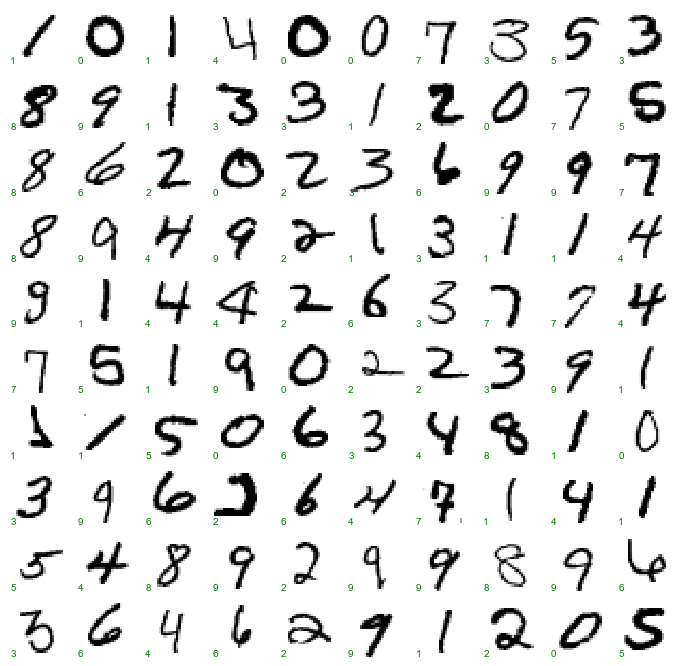

In [117]:
def vizualize_digits_100(digits):
    fig, axes = plt.subplots(10, 10, figsize=(12, 12),
                            subplot_kw={'xticks':[], 'yticks':[]},
                            gridspec_kw=dict(hspace=0.1, wspace=0.1))
    
    images = digits.drop('label', axis=1).iloc[:100, :].to_numpy()
    images = images.reshape(images.shape[0], 28, 28)
    labels = digits.label
    
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i], cmap='binary',
                 interpolation='nearest')
        ax.text(0.05, 0.05, str(labels[i]), fontsize=10,
               transform=ax.transAxes, color='green')


vizualize_digits_100(train_data)

In [118]:
num_classes = 10
input_shape = (28, 28, 1)

In [119]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [120]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [121]:
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [122]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [123]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ]
)

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 1600)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)               

In [124]:
batch_size = 128
epochs = 15

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 35s 82ms/step - loss: 0.3599 - accuracy: 0.8900 - val_loss: 0.0837 - val_accuracy: 0.9780
Epoch 2/15
422/422 [==============================] - 33s 79ms/step - loss: 0.1104 - accuracy: 0.9667 - val_loss: 0.0605 - val_accuracy: 0.9847
Epoch 3/15
422/422 [==============================] - 34s 81ms/step - loss: 0.0855 - accuracy: 0.9737 - val_loss: 0.0498 - val_accuracy: 0.9855
Epoch 4/15
422/422 [==============================] - 35s 82ms/step - loss: 0.0720 - accuracy: 0.9778 - val_loss: 0.0440 - val_accuracy: 0.9892
Epoch 5/15
422/422 [==============================] - 34s 80ms/step - loss: 0.0632 - accuracy: 0.9807 - val_loss: 0.0363 - val_accuracy: 0.9902
Epoch 6/15
422/422 [==============================] - 35s 82ms/step - loss: 0.0568 - accuracy: 0.9823 - val_loss: 0.0367 - val_accuracy: 0.9903
Epoch 7/15
422/422 [==============================] - 34s 81ms/step - loss: 0.0517 - accuracy: 0.9834 - val_loss: 0.0348 - val_accuracy:

In [125]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.02595902793109417
Test accuracy: 0.991100013256073


In [126]:
test_images = []
X_test = test_data.to_numpy()
for i in range(X_test.shape[0]):
    test_images.append(X_test[i].reshape(28, 28))

In [127]:
alpha = 30
for i in range(len(test_images)):
    blurred_f = ndimage.gaussian_filter(test_images[i], 3)
    filter_blurred_f = ndimage.gaussian_filter(blurred_f, 1)
    sharpened = blurred_f + alpha * (blurred_f - filter_blurred_f)
    test_images[i] = sharpened

In [128]:
test_images = np.array(test_images)
test_images = test_images[:, :, :, np.newaxis]

In [129]:
y_pred = model.predict(test_images)

In [130]:
y_pred.shape

(28000, 10)

In [131]:
y = train_data.to_numpy()[:, 0]
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(y.reshape(-1, 1))

OneHotEncoder(handle_unknown='ignore')

In [132]:
y_binary=enc.transform(y.reshape(-1,1)).toarray()

In [133]:
label = []
y_pred = np.round(y_pred)

In [134]:
y_pred

array([[0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [135]:
Y_test = enc.inverse_transform(y_pred)

In [136]:
submission = pd.DataFrame({
    'ImageId': np.arange(1, len(Y_test) + 1),
    'Label': Y_test.T[0]
})

In [139]:
submission.to_csv('submission_2.csv', index=False)